In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv")
sample = df.sample(n=50,random_state=42)
female_height = sample.loc[ sample['Gender']=='Female',"Height"]
male_height = sample.loc[ sample['Gender']=='Male',"Height"]
## Getting means for gender height
print(f"For Males (n={len(male_height)}): Mean={np.mean(male_height):.2f}")
print(f"For Females (n={len(female_height)}): Mean={np.mean(female_height):.2f}")

For Males (n=27): Mean=68.90
For Females (n=23): Mean=64.13


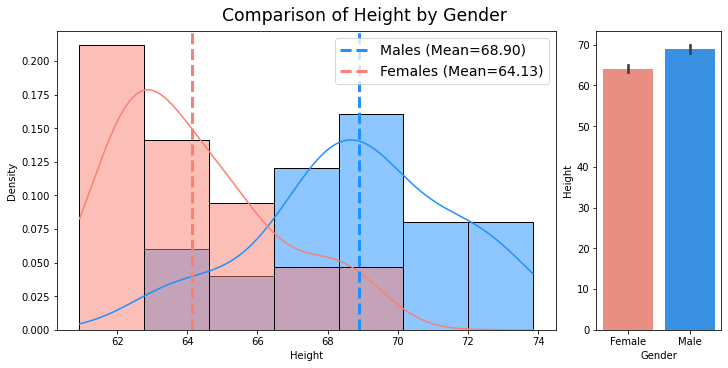

In [4]:
gender_palette={'Male':'dodgerblue', "Female":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='Height',fill=True,hue='Gender',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(male_height), ls='--',lw=3, 
           label=f"Males (Mean={np.mean(male_height):.2f})",color=gender_palette['Male'])

ax.axvline(np.mean(female_height), ls='--', lw=3, 
           label=f"Females (Mean={np.mean(female_height):.2f})",color=gender_palette['Female'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='Gender',y='Height',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Height by Gender',fontsize='xx-large');

- Null Hypothesis: Males and females have the same average height. (There is no statistical significance between the heights of the groups)

- Alternative Hypothesis: Males and females have different average height. (There is a statistical significance between the heights of the two groups)

- Alpha: We will be using an alpha=.05

In [5]:
#Testing for Outliers female
zscores_f = stats.zscore(female_height)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [6]:
#Testing for Outliers male
zscores_m = stats.zscore(male_height)
outliers_m = abs(zscores_m)>3
np.sum(outliers_m)

0

In [8]:
#Test Each Group for Normality
# normal test males
result_m = stats.normaltest(male_height)
result_m

NormaltestResult(statistic=0.33615904712566513, pvalue=0.8452866118088072)

In [9]:
# normal test females
result_f = stats.normaltest(female_height)
result_f

NormaltestResult(statistic=2.8307141616584417, pvalue=0.2428388848547339)

For both the male and female group, the p-value is greater than 0.05 so we can assume these are normal distributions.

As with any statistical test, you must know what the null hypothesis is so you are able to interpret the results.  For Levene's test, the null hypothesis is: All samples are from populations with equal variances.  

In [10]:
#Testing for Equal Variance with Levene's test
result = stats.levene(female_height, male_height)
result

LeveneResult(statistic=0.4550154927872889, pvalue=0.5031988559709122)

In [11]:
#Independent t-test
## Final t-test, after confirming we meet the assumptions
result = stats.ttest_ind(female_height,male_height)
result

Ttest_indResult(statistic=-6.700593917991493, pvalue=2.1170736038110527e-08)

In [12]:
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000212
Significant: True


- Based on our t-test, we have a significant result. Remember that a significant result (p < 0.05) means we reject the null hypothesis and accept the alternative hypothesis.  In this case, this means that there IS a difference between male and female heights.

- In conclusion, we performed an independent t-test comparing height by gender and found a significant difference between males and females (p<.05). Males had a significantly larger height than females.